# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético).

### 1. Carga las librerias que consideres comunes al notebook

In [42]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [43]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

df = pd.read_csv(url, names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
df
# df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Descripción de las columnas
- preg: Número de embarazos: Número de veces que la mujer ha estado embarazada.
Interpretación: Un mayor número de embarazos puede estar relacionado con un mayor riesgo de diabetes debido a factores hormonales.

- plas: Concentración de glucosa en plasma (en mg/dl) a 2 horas en una prueba de tolerancia a la glucosa oral.
Interpretación: Es una medida clave en la determinación de la diabetes, ya que niveles altos de glucosa en plasma indican resistencia a la insulina o diabetes.

- pres: Presión arterial diastólica (en mm Hg).
Interpretación: La hipertensión es un factor de riesgo para la diabetes tipo 2, ya que está asociada con problemas metabólicos.

- skin: Espesor del pliegue cutáneo del tríceps (en mm).
Interpretación: Es un indicador indirecto de la cantidad de grasa corporal. Un mayor espesor podría correlacionarse con un mayor riesgo de diabetes, ya que la grasa corporal puede afectar la resistencia a la insulina.

- test: Resultado de la prueba de diabetes (nuevamente, con una prueba de tolerancia a la glucosa).
Interpretación: Esta columna indica si la persona ha tenido una prueba de diabetes en el pasado y si ha sido positiva o no.

- mass: Índice de masa corporal (IMC): Es el peso en kg dividido por el cuadrado de la altura en metros.
Interpretación: El IMC es un indicador clave de la obesidad. Un mayor IMC está asociado con un mayor riesgo de desarrollar diabetes tipo 2 debido a la resistencia a la insulina.

- pedi: Historial familiar de diabetes: Un valor que indica si la persona tiene antecedentes familiares de diabetes.
Interpretación: Tener antecedentes familiares de diabetes aumenta el riesgo de desarrollar la enfermedad, ya que la genética juega un papel importante. Te da el factor de riesgo genético, cuanto más alto sea el valor mayor riesgo. Tiene un rango que típicamente oscila entre 0 (sin antecedentes familiares de diabetes) y alrededor de 2.42 en el caso de un alto riesgo familiar.

- age: Edad de la persona en años.
Interpretación: El riesgo de diabetes generalmente aumenta con la edad, especialmente después de los 45 años.

- class: Clase (resultado): Esta es la variable de salida, y contiene 2 posibles valores:
0: No tiene diabetes, 1: Tiene diabetes **Interpretación:** Es la variable que indica si la persona padece o no diabetes, que es el objetivo principal del modelo predictivo.

In [44]:
# Obtener el valor más alto de la columna 'pedi'
max_pedi_value = df['pedi'].max()

print("El valor más alto en la columna 'pedi' es:", max_pedi_value)

El valor más alto en la columna 'pedi' es: 2.42


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [48]:
# para ver la distribución de la variable objetivo
df["class"].value_counts()

class
0    500
1    268
Name: count, dtype: int64

<Axes: >

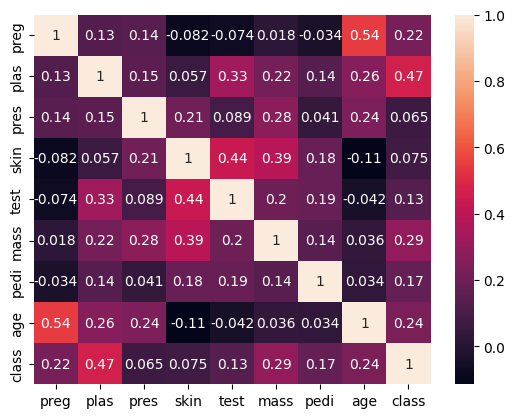

In [49]:
# Matrix de correlación
sns.heatmap(df.corr(), annot=True)

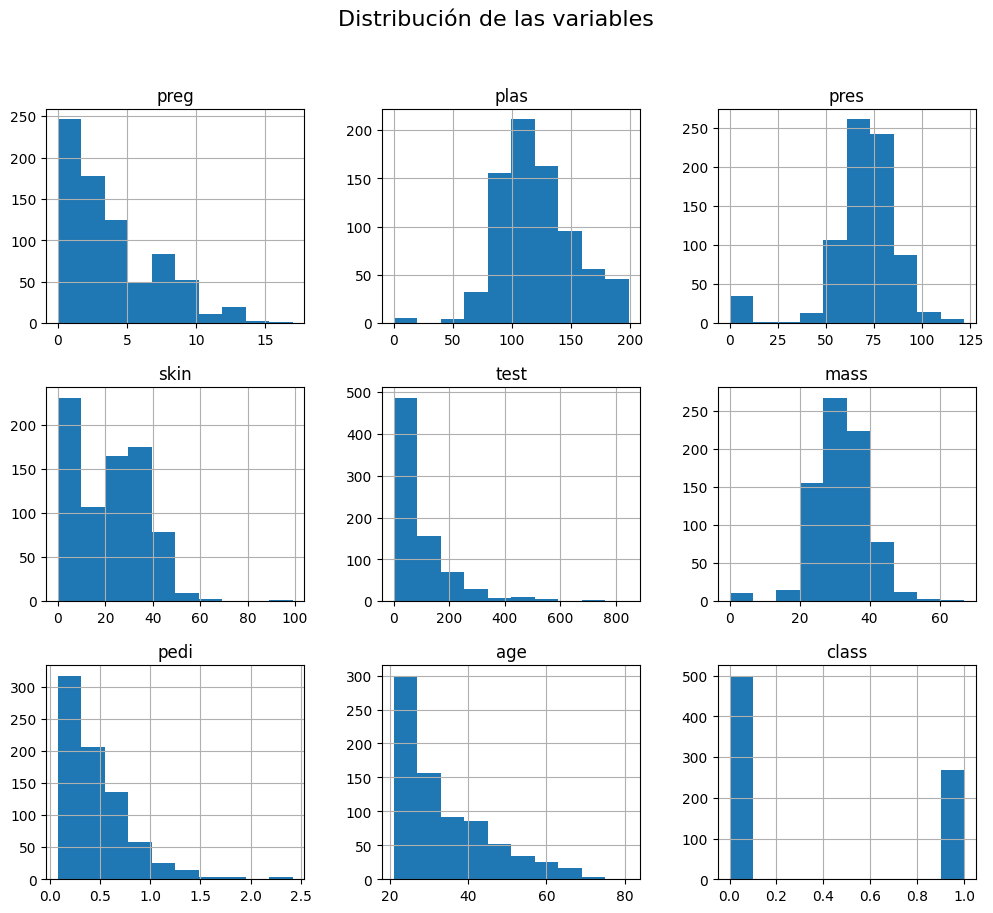

In [50]:
# Histograma para cada variable
df.hist(figsize=(12, 10))
plt.suptitle("Distribución de las variables", fontsize=16)
plt.show()

Text(0.5, 1.02, 'Pairplot de las variables')

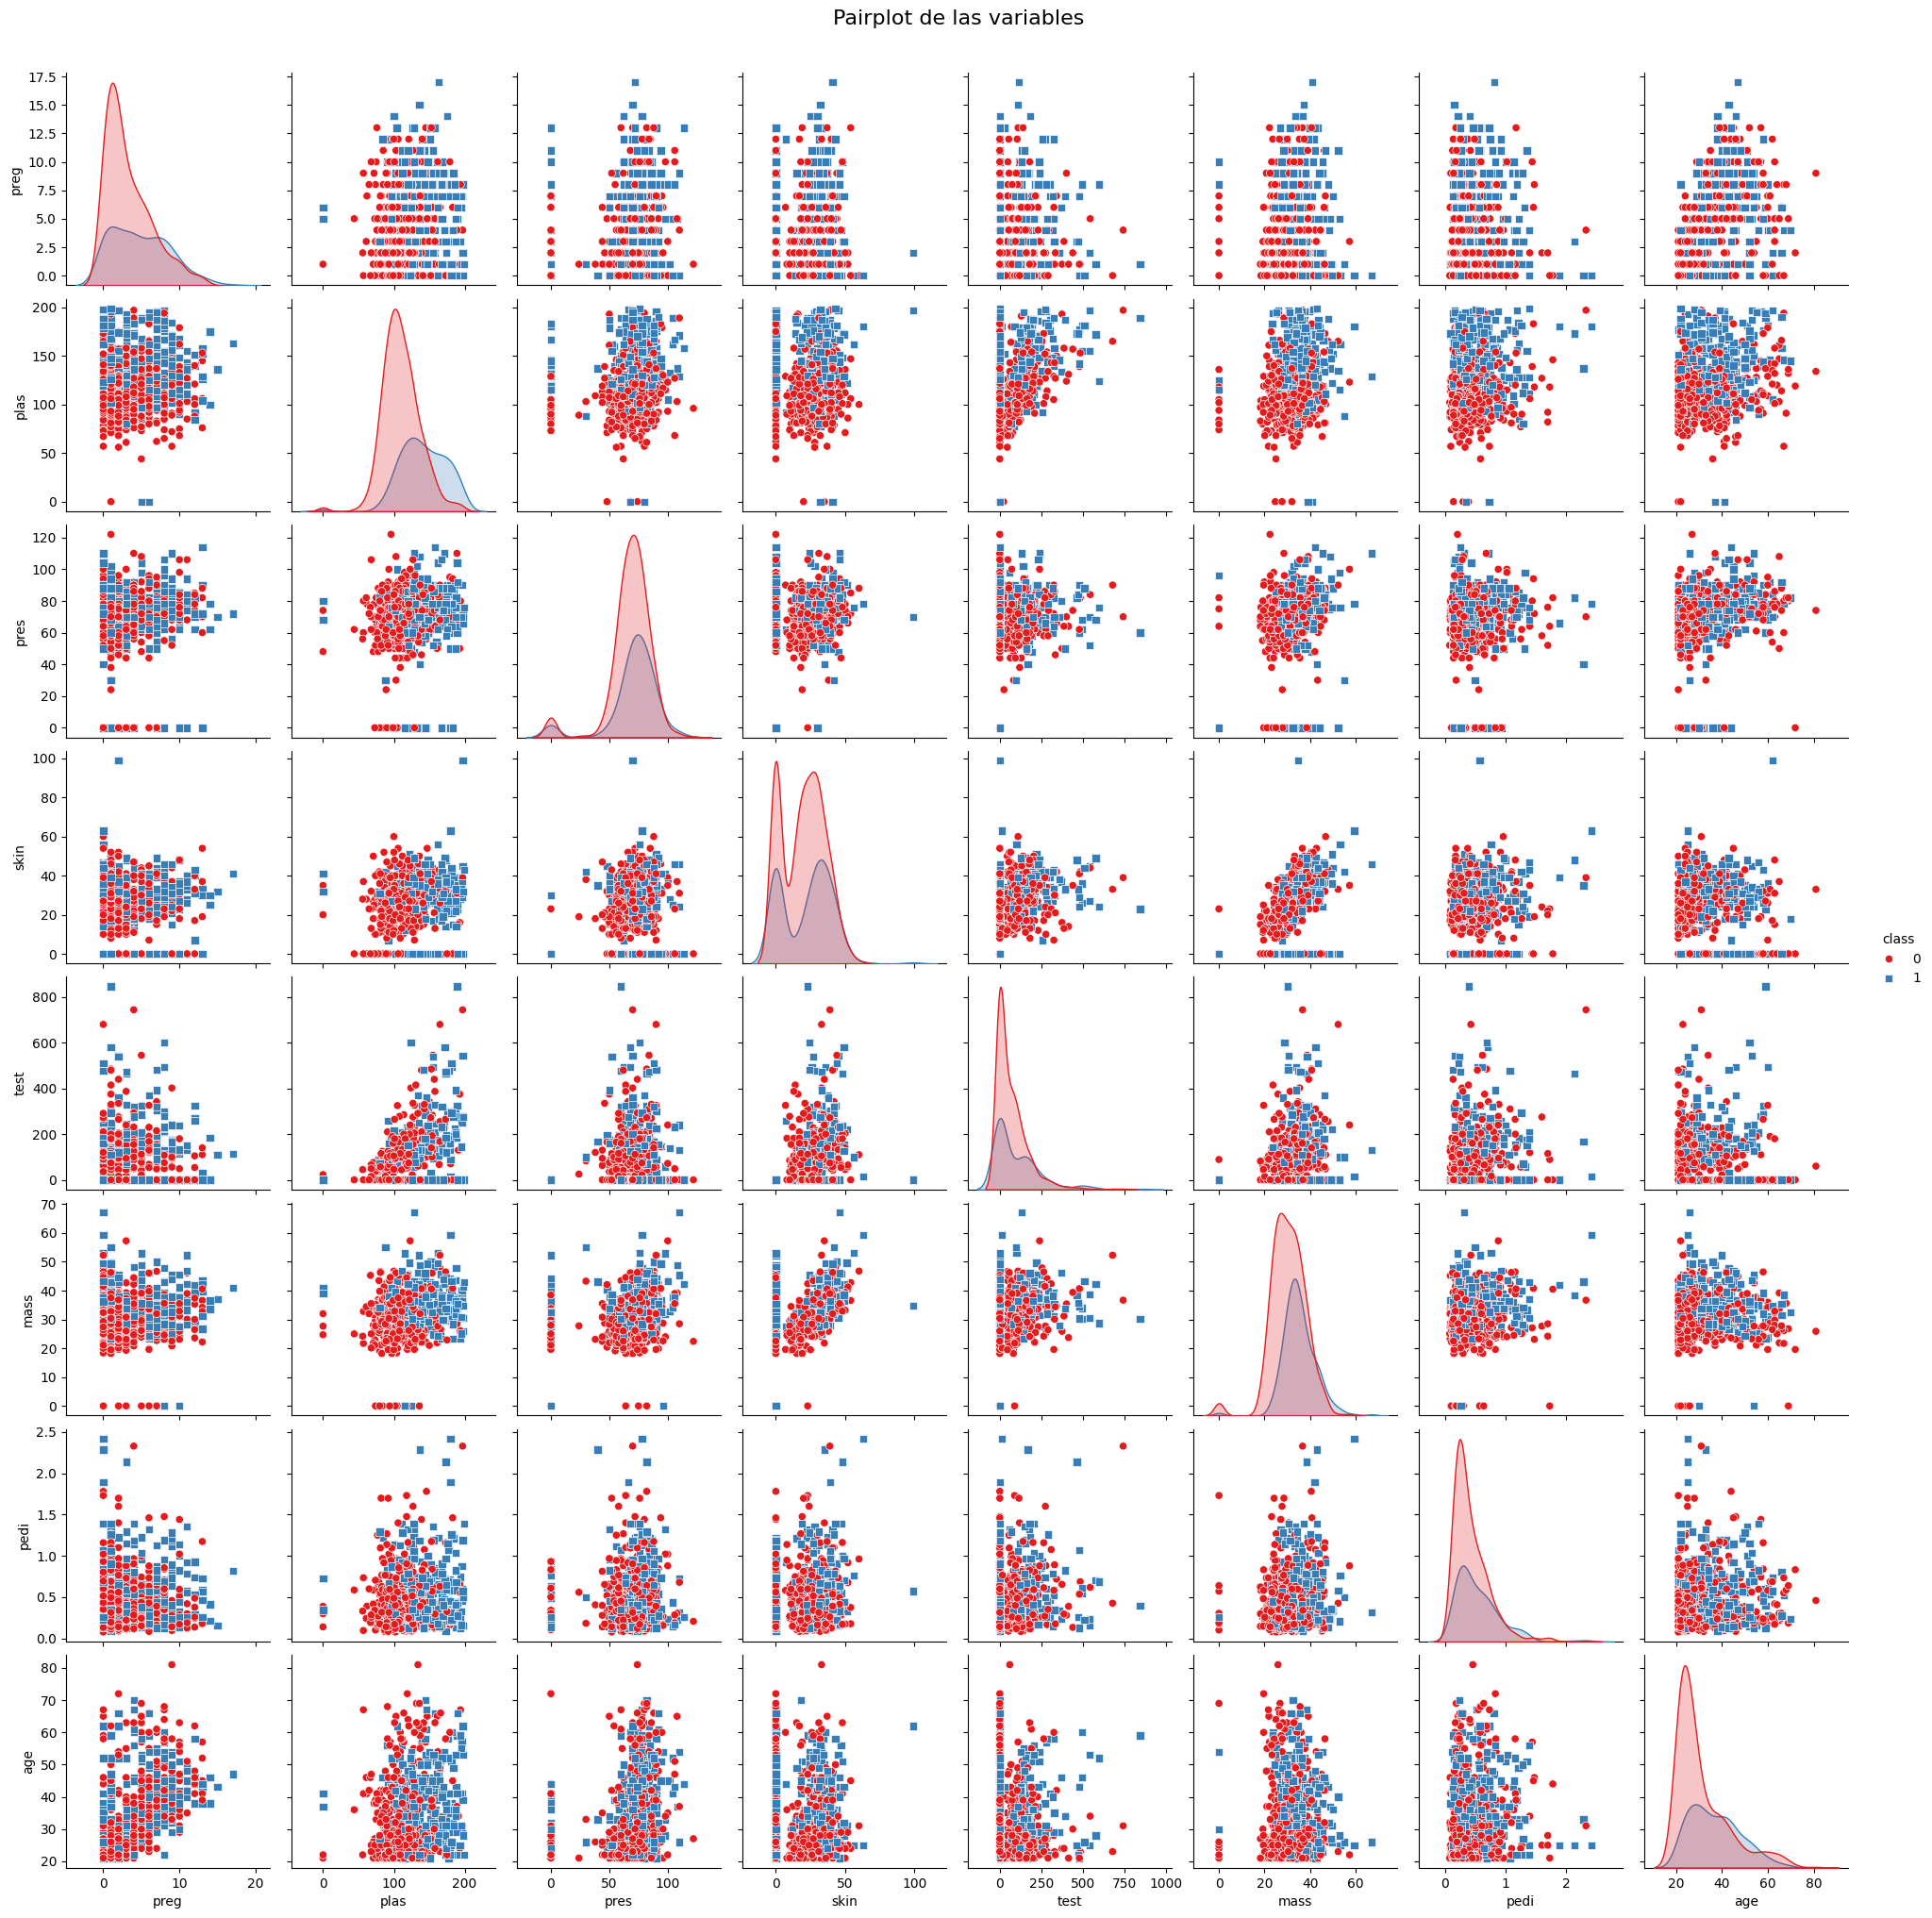

In [51]:
# pairplot para ver la relación entre variables
sns.pairplot(df, hue='class', diag_kind='kde', markers=["o", "s"], palette="Set1")
plt.suptitle("Pairplot de las variables", fontsize=16, y=1.02)

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


# Dividir en características (features) y variable objetivo (target)
X = df.drop(columns=['class'])  # Características
y = df['class']  # Variable objetivo

# Establecer semilla para reproducibilidad
np.random.seed(42)

# Inicializar el modelo de Bagging con 100 árboles de decisión
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Usar KFold para validación cruzada con 10 divisiones (kfolds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lista para almacenar las puntuaciones de cada fold
cv_scores = []

# Realizar KFold Cross Validation
for train_index, test_index in kf.split(X):
    # Dividir los datos en entrenamiento y prueba para cada fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Ajustar el modelo de Bagging
    bagging_model.fit(X_train, y_train)
    
    # Predecir en el conjunto de test
    y_pred = bagging_model.predict(X_test)
    
    # Calcular la precisión para este fold
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

# Calcular la precisión promedio y la desviación estándar
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"Precisión promedio de Bagging con 100 árboles de decisión: {mean_accuracy:.4f}")
print(f"Desviación estándar de la precisión: {std_accuracy:.4f}")


Precisión promedio de Bagging con 100 árboles de decisión: 0.7565
Desviación estándar de la precisión: 0.0521


Coeficientes de correlacion mas altos

In [53]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Aplanar la matriz de correlación y ordenar por valor absoluto
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filtrar los coeficientes más altos, excluyendo la correlación consigo misma (ítems en la diagonal)
correlation_values = correlation_values[correlation_values < 1]

# Mostrar los coeficientes más altos
top_correlations = correlation_values.head(10)  # Muestra las 10 correlaciones más altas
print(top_correlations)

age    preg     0.544341
preg   age      0.544341
plas   class    0.466581
class  plas     0.466581
skin   test     0.436783
test   skin     0.436783
mass   skin     0.392573
skin   mass     0.392573
test   plas     0.331357
plas   test     0.331357
dtype: float64


### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


# Inicializar el modelo de Random Forest con 100 árboles y max_features=3
rf_model = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)

# Usar KFold para validación cruzada con 10 divisiones (kfolds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lista para almacenar las puntuaciones de cada fold
cv_scores = []

# Realizar KFold Cross Validation
for train_index, test_index in kf.split(X):
    # Dividir los datos en entrenamiento y prueba para cada fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Ajustar el modelo de Random Forest
    rf_model.fit(X_train, y_train)
    
    # Predecir en el conjunto de test
    y_pred = rf_model.predict(X_test)
    
    # Calcular la precisión para este fold
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

# Calcular la precisión promedio y la desviación estándar
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"Precisión promedio de Random Forest con 100 árboles y max_features=3: {mean_accuracy:.4f}")
print(f"Desviación estándar de la precisión: {std_accuracy:.4f}")

Precisión promedio de Random Forest con 100 árboles y max_features=3: 0.7695
Desviación estándar de la precisión: 0.0557


### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score



# Inicializar el clasificador de AdaBoost con 30 árboles y un árbol de decisión base (stump)
base_estimator = DecisionTreeClassifier(max_depth=1)  # Árbol con un solo nivel (stump)
ada_boost_model = AdaBoostClassifier(
    estimator=base_estimator,  # Establecer el estimador base
    n_estimators=30,  # Número de árboles
    random_state=42
)

# Usar KFold para validación cruzada con 10 divisiones (kfolds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lista para almacenar las puntuaciones de cada fold
cv_scores = []

# Realizar KFold Cross Validation
for train_index, test_index in kf.split(X):
    # Dividir los datos en entrenamiento y prueba para cada fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Ajustar el modelo de AdaBoost
    ada_boost_model.fit(X_train, y_train)
    
    # Predecir en el conjunto de test
    y_pred = ada_boost_model.predict(X_test)
    
    # Calcular la precisión para este fold
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

# Calcular la precisión promedio y la desviación estándar
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"Precisión promedio de AdaBoost con 30 árboles: {mean_accuracy:.4f}")
print(f"Desviación estándar de la precisión: {std_accuracy:.4f}")

Precisión promedio de AdaBoost con 30 árboles: 0.7617
Desviación estándar de la precisión: 0.0503


### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [56]:
from sklearn.ensemble import GradientBoostingClassifier


# Inicializar el clasificador de Gradient Boosting con 100 estimadores
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # Número de estimadores (árboles)
    random_state=42
)

# Usar KFold para validación cruzada con 10 divisiones (kfolds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lista para almacenar las puntuaciones de cada fold
cv_scores = []

# Realizar KFold Cross Validation
for train_index, test_index in kf.split(X):
    # Dividir los datos en entrenamiento y prueba para cada fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Ajustar el modelo de Gradient Boosting
    gb_model.fit(X_train, y_train)
    
    # Predecir en el conjunto de test
    y_pred = gb_model.predict(X_test)
    
    # Calcular la precisión para este fold
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

# Calcular la precisión promedio y la desviación estándar
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"Precisión promedio de Gradient Boosting con 100 estimadores: {mean_accuracy:.4f}")
print(f"Desviación estándar de la precisión: {std_accuracy:.4f}")

Precisión promedio de Gradient Boosting con 100 estimadores: 0.7655
Desviación estándar de la precisión: 0.0553


### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [57]:
import xgboost

xgb_clas = xgboost.XGBClassifier(random_state=42)

xgb_clas.fit(X_train, y_train)
y_pred = xgb_clas.predict(X_test)
accuracy_score(y_test, y_pred)


# Calcular la precisión promedio y la desviación estándar
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"Precisión promedio de Gradient Boosting con 100 estimadores: {mean_accuracy:.4f}")
print(f"Desviación estándar de la precisión: {std_accuracy:.4f}")


Precisión promedio de Gradient Boosting con 100 estimadores: 0.7655
Desviación estándar de la precisión: 0.0553


### 8. Primeros resultados
Crea un dataframe con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [58]:
resultados = {
    'Bagging (100 árboles)': 0.7565,
    'Random Forest (100 árboles, max_features=3)': 0.7695,
    'AdaBoost (30 árboles)': 0.7655,
    'Gradient Boosting (100 estimadores)': 0.7655,
    'XGBoost (100 estimadores)':  0.7409
}


# Crear el DataFrame
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Algoritmo', 'Precisión'])

# Ordenar de mayor a menor
df_resultados = df_resultados.sort_values(by='Precisión', ascending=False).reset_index(drop=True)

df_resultados


,Algoritmo,Precisión
0,"Random Forest (100 árboles, max_features=3)",0.7695
1,Gradient Boosting (100 estimadores),0.7655
2,AdaBoost (30 árboles),0.7655
3,Bagging (100 árboles),0.7565
4,XGBoost (100 estimadores),0.7409


### 9. Hiperparametrización
Vuelve a entrenar los modelos de nuevo, pero esta vez dividiendo el conjunto de datos en train/test y utilizando un gridsearch para encontrar los mejores hiperparámetros.

In [71]:
from sklearn.model_selection import train_test_split

seed = 42  # Número fijo para reproducibilidad

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(614, 8)
(154, 8)
(614,)
(154,)


In [72]:
RandomForestClassifier()

RandomForestClassifier()

In [73]:
parameters = {
    "n_estimators": [40, 50, 80],
    "max_depth": [2,3,4],
    "max_features": [2,3,4],
    "max_leaf_nodes": [8,10,12]
}

In [74]:
3 * 5 * 3* 3 * 5

675

In [75]:
rfc_gs = GridSearchCV(RandomForestClassifier(random_state=seed), parameters, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [2, 3, 4],
                         'max_leaf_nodes': [8, 10, 12],
                         'n_estimators': [40, 50, 80]},
             scoring='accuracy', verbose=2)

In [76]:
print(rfc_gs.best_estimator_)
print(rfc_gs.best_score_)
print(rfc_gs.best_params_)

RandomForestClassifier(max_depth=4, max_features=2, max_leaf_nodes=12,
                       n_estimators=80, random_state=42)
0.7720111955217913
{'max_depth': 4, 'max_features': 2, 'max_leaf_nodes': 12, 'n_estimators': 80}


In [77]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [78]:
final_rfc = rfc_gs.best_estimator_

final_rfc.fit(X_train, y_train)
y_pred = final_rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7727272727272727
0.6
[[86 13]
 [22 33]]


In [84]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

results_bc_cv = cross_val_score(final_rfc, X, y, cv=cv, scoring='accuracy')
print(results_bc_cv)
print(results_bc_cv.mean())
print(results_bc_cv.std())


[0.80519481 0.77922078 0.77272727 0.79738562 0.71895425]
0.7746965452847807
0.030253887034191667


In [85]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=3, random_state=seed)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7532467532467533
0.6545454545454545
[[80 19]
 [19 36]]


In [86]:
results_bc_cv = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=5, max_features=3, random_state=seed), X, y, cv=cv, scoring='accuracy')
print(results_bc_cv)
print(results_bc_cv.mean())
print(results_bc_cv.std())

[0.75974026 0.80519481 0.77922078 0.77777778 0.73856209]
0.772099142687378
0.02216196412791747


In [87]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [88]:
parameters = {
    "n_estimators": [50, 150, 200, 300],
    "max_depth": [1,2,3],
    "learning_rate": [0.005,0.01,0.05],
}

gbc_gs = GridSearchCV(GradientBoostingClassifier(random_state=seed), parameters, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

gbc_gs.fit(X_train, y_train)

print(gbc_gs.best_estimator_)
print(gbc_gs.best_score_)
print(gbc_gs.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=300,
                           random_state=42)
0.7784886045581768
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}


In [89]:
final_gbc = gbc_gs.best_estimator_

final_gbc.fit(X_train, y_train)
y_pred = final_gbc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7792207792207793
0.6363636363636364
[[85 14]
 [20 35]]


In [90]:
results_gbc_cv = cross_val_score(final_gbc, X, y, cv=cv, scoring='accuracy')
print(results_gbc_cv)
print(results_gbc_cv.mean())
print(results_gbc_cv.std())

[0.77922078 0.79220779 0.77922078 0.79738562 0.70588235]
0.770783464901112
0.03323012905369628


### 10. Conclusiones finales

El modelo elegido es el RF hiperparametrizado, que es el que mejor accuracy ha obtenido ante test, es decir, el que mejor generaliza.

In [91]:
final_rfc

RandomForestClassifier(max_depth=4, max_features=2, max_leaf_nodes=12,
                       n_estimators=80, random_state=42)

In [92]:
pd.DataFrame(final_rfc.feature_importances_, index=X.columns, columns=["Feature importance"]).sort_values("Feature importance", ascending=False)

,Feature importance
plas,0.374495
mass,0.181469
age,0.179386
pedi,0.069700
preg,0.062246
test,0.061323
pres,0.039279
skin,0.032102
